# 1 Import Packages

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import logging

In [4]:
logging.basicConfig(level=logging.DEBUG)
logging.debug("test")

DEBUG:root:test


# 2 Create Dataset

In [12]:
coords = {"sample":range(10**6),"lat":np.arange(-90,90,10), "lon":np.arange(-180,180,10)}

In [13]:
size = [len(coords[key]) for key in coords]

In [17]:
coords.keys()

dict_keys(['sample', 'lat', 'lon'])

In [22]:
def xarray_random_normal( coords, loc=0.0, scale=1.0):
    size = [len(coords[key]) for key in coords]
    data = np.random.normal(loc = loc, scale= scale, size = size)
    data = xr.DataArray(data, dims = coords.keys(), coords = coords )
    return data

In [ ]:
feature

In [21]:
data = xarray_random_normal(coords, np.ones())

<xarray.DataArray (sample: 1000000, lat: 18, lon: 36)>
array([[[-1.59113484,  0.14496605, -0.63948943, ...,  0.49880582,
         -0.66771415,  1.2431758 ],
        [ 0.83340844,  0.91680001,  1.47376046, ..., -1.52397714,
         -0.96114325,  1.56359714],
        [ 0.75858086,  1.13382775,  0.00747843, ..., -1.13766114,
          1.33530324, -1.21239224],
        ...,
        [ 1.93038732,  0.06001203,  1.01658825, ..., -1.31817642,
         -1.69445038,  0.12982733],
        [-0.89990529, -0.55185039, -1.04544246, ...,  0.03675509,
          0.39279858,  0.31794683],
        [ 1.03014162, -0.94937493,  0.7899498 , ..., -0.24627374,
         -1.03925065, -0.9786353 ]],

       [[-1.98815398,  1.14997352, -2.04905136, ...,  1.74399653,
          0.3735856 , -0.38956289],
        [-2.06143825,  0.07807819, -0.35470365, ..., -1.58544781,
          2.6169046 , -0.20415561],
        [ 1.94249577,  1.18888453, -1.34504122, ..., -0.1816592 ,
         -0.43051441, -0.69848647],
...
        [-0.41731698, -1.80861403, -1.49814979, ...,  0.02061205,
         -0.49401759, -0.24317801],
        [-1.23914666,  1.0841046 , -0.06302192, ...,  1.13186654,
          1.03421979,  1.16343189],
        [ 0.59191357, -0.89999865, -0.27706115, ...,  0.32371689,
         -0.4373146 ,  1.29288278]],

       [[ 0.21775081, -0.42251603,  0.02294544, ..., -1.18683619,
         -0.95251755,  1.11400792],
        [-0.51052385,  1.68424193, -0.11650184, ..., -0.25319115,
          0.44836148,  2.22384641],
        [-2.48295368, -0.65991509,  0.74920305, ...,  2.24233219,
          0.70438177, -0.73725511],
        ...,
        [ 0.86874046,  0.30474714,  1.45446978, ..., -0.50985683,
          0.55146047,  0.25948698],
        [-0.94031809,  0.77030122,  1.59834167, ...,  0.26983949,
          1.00968449, -0.21549516],
        [-0.21854134,  0.82610294,  0.18727347, ...,  0.0142061 ,
         -1.30003906,  0.0489961 ]]])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 ... 999995 999996 999997 999998 999999
  * lat      (lat) int64 -90 -80 -70 -60 -50 -40 -30 ... 20 30 40 50 60 70 80
  * lon      (lon) int64 -180 -170 -160 -150 -140 -130 ... 130 140 150 160 170

In [3]:
lon = np.arange(-180,180,10)
lat = np.arange(-90,90,10)


N_lon = len(lon)
N_lat = len(lat)

N_sample = 1000

data = np.random.normal(loc=0.0,scale = 1.0, size=(N_lon, N_lat, N_sample))

In [4]:
data = np.random.normal(loc=0.0,scale = 1.0, size=(N_lon, N_lat, N_sample))

In [5]:
data = xr.DataArray(data, dims = ["lon", "lat", "sample"], coords = {"lon":lon,"lat":lat, "sample":range(N_sample)})

In [6]:
def xarray_multivariate_normal_distribution(mean, covariance, n_sample, feature_dim = "location",  sample_dim = "sample"):

    data_surrogate = np.random.multivariate_normal(mean, covariance, size = n_sample)
    
    data_surrogate = xr.DataArray(data_surrogate, dims  = [sample_dim, feature_dim], coords = {sample_dim:range(n_sample),
    feature_dim: mean.coords[feature_dim]})

    return data_surrogate

In [7]:
def xarray_autocovariance_matrix(data, sample_dimension = "time"):

    data_dimensions = list(data.dims)

    print(data_dimensions)
    if not sample_dimension in data_dimensions:
        raise ValueError(" ".join(sample_dimension, " not in dimensions ", str(data_dimension)))
    else:
        data_dimensions.remove(sample_dimension)

    rename_dict = {}
    for data_dimension in data_dimensions:
        rename_dict[data_dimension] = data_dimension+"_1"

    covariance = xr.cov(data, data.rename(rename_dict), dim=sample_dimension)

    return covariance


In [8]:
def xarray_multivariate_normal_zeromean(covariance, n_sample, feature_dim = "feature", sample_dim = "sample"):
    
    n_feature = covariance.sizes[feature_dim]
    mean = np.zeros(n_feature)
    mean = xr.DataArray(mean, dims = [feature_dim], coords = {feature_dim: covariance.coords[feature_dim]})

    data = xarray_multivariate_normal_distribution(mean, covariance, n_sample, feature_dim = feature_dim,  sample_dim = sample_dim)

    return data



In [9]:
def linear(x, x_s, y_s, slope):
    return y_s + (x-x_s)*slope 

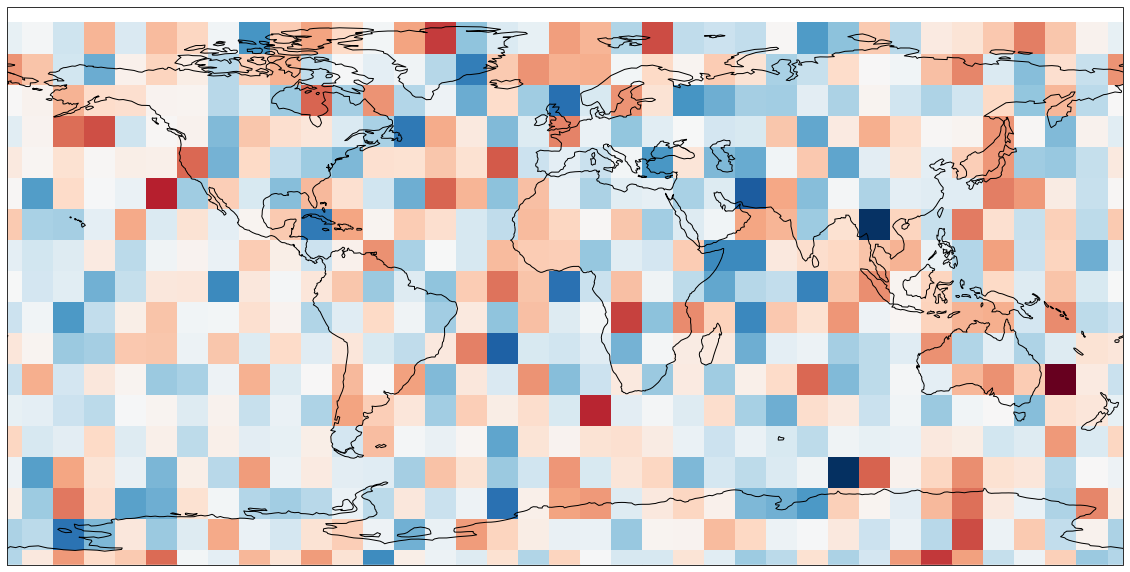

In [10]:
fig, ax = plt.subplots(1,1, figsize=(20,20), subplot_kw = {"projection":ccrs.PlateCarree()})

ax.pcolormesh(data.lon, data.lat, data.isel(sample=0).transpose("lat","lon"), cmap="RdBu_r", transform=ccrs.PlateCarree())
ax.coastlines()


# 3 Calculate Covariance Matrix

In [11]:
mean = data.mean(dim="sample")
mean_stack = mean.stack({"feature":("lon","lat")})

In [12]:
cov = xarray_autocovariance_matrix(data, sample_dimension="sample")
cov_stack = cov.stack(feature = ("lon","lat")).stack(feature_1 = ("lon_1","lat_1"))

['lon', 'lat', 'sample']


In [13]:
n_breaking_points = 1

In [14]:
data_surrogate =  xarray_multivariate_normal_distribution(mean_stack, cov_stack, n_sample=1000, feature_dim ="feature")

# 4 Make Piecwise Model

In [15]:
def gen_random_quantiles(data, n_breaking_points, feature_dim = "feature", sample_dim= "sample", breaking_dim = "breaking_point"):
    
    n_feature = data.sizes[feature_dim]
    
    quantiles = np.random.uniform(0,1, size = [n_breaking_points, n_feature])

    quantiles = xr.DataArray(quantiles, dims = [breaking_dim, feature_dim], coords = {breaking_dim: range(n_breaking_points), feature_dim:data.coords[feature_dim]})
    return quantiles

In [16]:
def cal_breaking_points_from_quantiles(data, quantiles, feature_dim ="feature", sample_dim = "sample", breaking_dim ="breaking_point"):
    
    arr = []
    n_feature = data.sizes[feature_dim]
    n_breaking_points = quantiles.sizes[breaking_dim]

    for feature_index in range(n_feature):
        data_tmp = data.isel(feature = feature_index)
        quantile_tmp = quantiles.isel(feature=feature_index)

        quantiles_xr = data_tmp.quantile(quantile_tmp, dim=sample_dim)
        quantiles_xr = quantiles_xr.assign_coords(quantile = range(n_breaking_points))
        quantiles_xr = quantiles_xr.rename({"quantile": breaking_dim})
        arr.append(quantiles_xr)
    breaking_points = xr.concat(arr, dim=feature_dim)
    breaking_points = breaking_points.assign_coords({feature_dim:data.coords[feature_dim]})

    return breaking_points

In [17]:
def add_zero_breaking_point(breaking_points, feature_dim = "feature", quantile_dim = "quantile_index", breaking_dim = "breaking_point" ):
    
     n_feature   = breaking_points.sizes[feature_dim]
     n_breaking_points = breaking_points.sizes[breaking_dim]
    
     breaking_zero = xr.DataArray(np.zeros([1, n_feature]), dims = [breaking_dim, feature_dim], coords = {breaking_dim:[n_breaking_points], feature_dim:breaking_points.coords[feature_dim]})

     breaking_points = xr.concat([breaking_zero, breaking_points], dim=breaking_dim)
     return breaking_points

In [18]:
def xarray_sort_reindex(data, sort_dim):
    axis_num = data.get_axis_num(sort_dim)
    n_sort_dim = data.sizes[sort_dim]

    data_sorted = np.sort(data, axis=axis_num)   
    data_sorted = xr.DataArray(data_sorted, coords = data.coords).assign_coords(breaking_point = range(n_sort_dim))
    return data_sorted
 


In [19]:
def cal_breaking_points_y(breaking_points, slopes, breaking_dim = "breaking_point"):
    n_breaking_points = breaking_points.sizes[breaking_dim]

    y= []
    y.append(xr.zeros_like(breaking_points).isel({breaking_dim:0}))


    for sta_index in range(n_breaking_points-1):
        end_index = sta_index+1
        logging.info(" ".join([str(sta_index),str(end_index)]))
        x_end = breaking_points.sel({breaking_dim:end_index})
        x_sta = breaking_points.sel({breaking_dim:sta_index})
        

        slope = slopes.sel({breaking_dim:sta_index}).reset_coords(drop=True)
        linear = (np.multiply(x_end-x_sta,slope) + y[sta_index]).assign_coords({breaking_dim:end_index})
        y.append(linear)

    data = xr.concat(y, dim= breaking_dim)
    
    data = data - data.sel(breaking_point = np.abs(breaking_points).argmin(dim=breaking_dim))

    return data

In [425]:
quantiles = gen_random_quantiles(data = data_surrogate, n_breaking_points = 0)

In [426]:
breaking_points = cal_breaking_points_from_quantiles(data= data_surrogate, quantiles = quantiles, feature_dim ="feature", sample_dim = "sample")

In [427]:
breaking_points_zero = add_zero_breaking_point(breaking_points)

In [428]:
breaking_points_zero_sorted = xarray_sort_reindex(data = breaking_points_zero, sort_dim = "breaking_point")

In [429]:
slopes = xarray_multivariate_normal_zeromean(covariance = cov_stack, n_sample = n_breaking_points +2, feature_dim="feature", sample_dim ="breaking_point")

In [430]:
slopes = slopes.assign_coords({"breaking_point":np.arange(-1,n_breaking_points+1)})

In [431]:
breaking_points_y =cal_breaking_points_y(breaking_points_zero_sorted, slopes)

In [434]:

breaking_points_merged = xr.merge([breaking_points_zero_sorted.rename("x"), breaking_points_y.rename("y")])

In [435]:
breaking_points_merged

<xarray.Dataset>
Dimensions:         (breaking_point: 1, feature: 648)
Coordinates:
  * breaking_point  (breaking_point) int64 0
  * feature         (feature) MultiIndex
  - lon             (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170
  - lat             (feature) int64 -90 -80 -70 -60 -50 -40 ... 40 50 60 70 80
Data variables:
    x               (breaking_point, feature) float64 0.0 0.0 0.0 ... 0.0 0.0
    y               (breaking_point, feature) float64 0.0 0.0 0.0 ... 0.0 0.0

In [450]:
def piecewise_combined(x, breaking_point_x, breaking_point_y, slope):
    value = np.nan

    condlist = []
    funclist = []
        
    cond = [(x < breaking_point_x[0])]
    func = [lambda k: breaking_point_y[0] + slope[0]*(k-breaking_point_x[0]),0]
    
    function = np.piecewise(x, cond, func)


    for i in range(0,len(breaking_point_x)-1):
        cond =  (  (x >= breaking_point_x[i]) * (x < breaking_point_x[i+1]))
        func =  [lambda k: breaking_point_y[i] + slope[i+1]*(k-breaking_point_x[i]),0]
        function = function+ np.piecewise(x, cond, func)


    
    
    cond = [x >= breaking_point_x[-1]]
    func =  [lambda k: breaking_point_y[-1] + slope[-1]*(k -breaking_point_x[-1]),0]
    function = function + np.piecewise(x,cond, func)

    #return condlist, funclist
    return function

In [451]:
def gen_breaking_points_xy(data, n_breaking_points = 1, breaking_dim ="breaking_point", feature_dim = "feature", sample_dim= "sample"):
    quantiles = gen_random_quantiles(data = data_surrogate, n_breaking_points = 0)
    
    breaking_points_x = cal_breaking_points_from_quantiles(data= data_surrogate, quantiles = quantiles, feature_dim = feature_dim, sample_dim = sample_dim)
    breaking_points_x_zero = add_zero_breaking_point(breaking_points_x)
    breaking_points_x_zero_sorted = xarray_sort_reindex(data = breaking_points_x_zero, sort_dim = breaking_dim)

    slopes = xarray_multivariate_normal_zeromean(covariance = cov_stack, n_sample = n_breaking_points +2, feature_dim= feature_dim, sample_dim = breaking_dim)
    slopes = slopes.assign_coords({breaking_dim:np.arange(-1,n_breaking_points+1)})
    breaking_points_y =cal_breaking_points_y(breaking_points_x_zero_sorted, slopes)


    breaking_points_merged = xr.merge([breaking_points_zero_sorted.rename("x"), breaking_points_y.rename("y"), slopes.rename("slopes")])
    return breaking_points_merged

In [465]:
breaking_points = gen_breaking_points_xy(data_surrogate)

In [457]:
n_feature = breaking_points.sizes["feature"]

In [464]:
breaking_points.isel(feature=feature_index).x

<xarray.DataArray 'x' (breaking_point: 3)>
array([nan,  0., nan])
Coordinates:
  * breaking_point  (breaking_point) int64 -1 0 1
    feature         object (-170, -70)

In [469]:
breaking_points.isel(feature=feature_index).y.dropna(dim="breaking_point")

<xarray.DataArray 'y' (breaking_point: 1)>
array([0.])
Coordinates:
  * breaking_point  (breaking_point) int64 0
    feature         object (-170, -70)

In [474]:
piecewise_combined(
data_surrogate.isel(feature=feature_index).values,
breaking_points.isel(feature=feature_index).y.dropna(dim="breaking_point").values,
breaking_points.isel(feature=feature_index).y.dropna(dim="breaking_point").values,
slopes.isel(feature=feature_index).values)

array([-7.93772285e-01,  1.26483888e-01,  2.61987977e-01, -7.05507309e-02,
       -7.28537733e-01, -2.48592141e-01, -4.66820068e-01, -3.83393158e-01,
       -5.26720173e-01, -3.61001124e-01, -3.04923267e-01,  1.06741227e-01,
       -6.15103250e-01, -2.89764928e-02, -1.19092830e-01, -1.00351198e-01,
        7.69395962e-01, -1.95849585e-01,  2.55679097e-01,  1.40502809e-01,
       -9.70136754e-02,  4.10625215e-01, -2.31923822e-01,  1.25699191e+00,
        1.04107742e+00, -1.85852342e-01, -3.46817667e-01,  2.34630218e-01,
        2.74232731e-01,  2.22020272e-01,  1.18440830e-01, -4.64149521e-01,
       -5.35698935e-01, -1.13855143e+00,  3.48839762e-01, -2.93439165e-01,
        2.91850811e-01,  3.17192211e-01, -2.73401570e-01,  7.82056647e-01,
       -1.31992613e-01, -2.52442437e-01, -2.97931312e-01,  1.19491508e+00,
        8.91291494e-01,  2.19238859e-01,  2.36455229e-01, -8.40853128e-01,
       -3.72551023e-01, -1.12710760e-01,  4.49773846e-02, -4.59711395e-01,
        2.34805076e-01,  

In [475]:
breaking_points

<xarray.Dataset>
Dimensions:         (breaking_point: 3, feature: 648)
Coordinates:
  * breaking_point  (breaking_point) int64 -1 0 1
  * feature         (feature) MultiIndex
  - lon             (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170
  - lat             (feature) int64 -90 -80 -70 -60 -50 -40 ... 40 50 60 70 80
Data variables:
    x               (breaking_point, feature) float64 nan nan nan ... nan nan
    y               (breaking_point, feature) float64 nan nan nan ... nan nan
    slopes          (breaking_point, feature) float64 -1.727 1.225 ... 0.009352

In [478]:
input_data

<xarray.DataArray (sample: 1000)>
array([ 2.56948729e-01, -1.95433685e+00,  6.18659559e-01, -8.89880577e-01,
        1.11832671e+00,  2.00667337e-01,  4.01568788e-01, -1.32770084e+00,
       -9.08095319e-01,  4.98160946e-02, -6.67188018e-01,  7.29434290e-01,
        4.59727614e-01, -1.34810681e-01,  6.01461286e-01,  1.27725142e+00,
        4.04281071e-01, -9.39637393e-01, -1.48801249e-01, -7.97809616e-01,
        9.48775023e-01, -8.62852580e-01,  4.82115742e-01,  4.52542350e-01,
        6.38662698e-01, -8.27556050e-01,  1.29824769e-01,  8.51986003e-01,
       -9.01556724e-01,  8.91030759e-01, -5.85628271e-01, -1.31740389e+00,
       -1.81554443e+00,  4.53764434e-01,  1.33275086e+00, -2.53163174e-01,
       -1.09166870e+00, -2.76946189e+00,  2.35359513e-01,  1.56225001e+00,
       -6.48700263e-01, -7.80309228e-01,  6.85029014e-01,  8.10332080e-01,
       -5.40207624e-01,  7.42070853e-01, -1.57442408e+00, -1.27610707e+00,
        5.55893476e-01,  3.14523207e-01,  9.73097291e-02, -1.03159867e+00,
       -3.42808152e+00,  7.26217481e-01,  1.72270890e+00, -2.15863200e+00,
       -4.72765514e-02, -8.22037000e-01, -8.88875265e-02,  4.06152366e-01,
        2.84584502e-01,  2.78827321e-01, -1.54083463e+00,  4.96981693e-01,
       -1.87666535e-01,  2.72392475e-01, -6.45920363e-01,  2.73218816e-01,
       -2.73089974e-01, -7.46592999e-01,  1.19438516e+00,  5.12730572e-01,
        8.70985472e-01,  6.20700786e-01, -6.45551512e-01, -7.53428375e-01,
        1.09288587e-01,  2.12998027e-01, -8.01485392e-01, -8.16298812e-01,
...
       -2.58366659e-01,  6.22669867e-01, -2.16391844e+00, -6.82193229e-01,
        1.49079340e+00,  1.45255072e+00, -2.23639927e-01,  1.03227101e+00,
       -1.97310669e+00, -7.06262632e-01, -6.30809787e-01, -1.75381127e+00,
        5.94865853e-01,  9.01126094e-01, -3.64336673e-01, -3.48141725e-01,
       -6.46779134e-02, -1.53961702e+00,  1.74112262e-01,  7.61403414e-01,
       -1.17033337e+00,  1.39583357e+00, -3.32804611e-02,  3.37770142e-01,
        1.07828678e+00, -8.92368946e-01, -1.80944956e+00,  3.31498516e-02,
       -8.68951773e-02,  5.07668343e-01,  2.97504372e-01, -8.86625566e-01,
        2.39591869e+00,  1.01124780e+00,  2.13914541e-01,  9.67402473e-01,
       -9.08064036e-01,  1.78516279e-01,  7.11519899e-01, -2.66341000e+00,
        8.74868654e-01,  6.77329333e-01,  1.15479231e+00, -1.37022607e+00,
        1.90091677e+00, -1.46888814e+00, -4.12830124e-02, -3.88264596e-01,
       -7.78679205e-01, -7.24835119e-01, -9.29803503e-01, -1.36721610e+00,
        6.68251073e-02,  1.13772697e+00,  4.64023060e-01, -2.26368240e-01,
        1.80410073e+00, -1.93473202e+00, -1.53913942e+00,  4.70744153e-01,
        6.90661899e-01,  9.39623076e-01, -8.05785853e-01,  4.00635368e-01,
        1.31237310e+00,  8.34975856e-01,  4.36608241e-01, -8.18379750e-01,
       -8.63459920e-02,  1.44674196e+00,  8.11496983e-01,  2.14870683e-01,
       -1.26212912e-01, -4.69059187e-02,  1.15080287e-01, -1.68585452e+00,
        5.12287497e-02,  5.35611892e-01,  6.77307491e-01, -4.74158744e-01])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
    feature  object (170, 80)

In [493]:
def cal_output_linear_piecewise(data, breaking_points, breaking_dim ="breaking_point", sample_dim="sample", feature_dim ="feature"):
    arr = []
    n_feature = data.sizes["feature"]

    for feature_index in range(n_feature):
        input_data = data.isel(feature=feature_index)
        x_start = breaking_points.isel(feature=feature_index).y.dropna(dim = breaking_dim)
        y_start = breaking_points.isel(feature=feature_index).y.dropna(dim = breaking_dim)
        slope =   breaking_points.isel(feature=feature_index).slopes

        tmp_data = piecewise_combined(
        input_data.values,
        x_start.values,
        y_start.values,
        slope.values)

        tmp_data = xr.DataArray(tmp_data, dims=[sample_dim], coords = {sample_dim:input_data.coords[sample_dim]})
        tmp_data = tmp_data.assign_coords({feature_dim:feature_index})
        arr.append(tmp_data)

    result = xr.concat(arr, dim = feature_dim)
    return result



In [494]:
output = cal_output_linear_piecewise(data_surrogate, breaking_points)

In [497]:
output.isel(feature=23)

<xarray.DataArray (sample: 1000)>
array([-1.65332961e+00, -6.99446736e-01, -4.38730886e-01, -2.78333424e-01,
       -4.03693039e-01, -1.44563526e+00, -9.49015964e-01, -1.57113349e+00,
       -2.11528161e-01, -1.31670125e+00, -1.89732068e-01, -3.96524833e-01,
       -1.65224918e+00, -1.40642714e+00, -1.31470772e+00, -6.74908101e-01,
       -1.10922678e-01, -7.59665607e-02, -5.26311689e-01, -2.29962683e-01,
       -2.64988981e-01, -7.38352458e-01, -1.35638307e+00, -4.18886636e-01,
       -8.61385464e-02, -1.05824413e+00, -3.80402290e-01, -2.93774548e+00,
       -1.32442762e+00, -1.84693007e+00, -9.95288604e-01, -4.84429194e-01,
       -6.45120059e-01, -8.85817375e-01, -1.25608675e-01, -9.01630896e-02,
       -1.43162594e-01, -1.30091048e-01, -1.06893537e+00, -1.22416951e-01,
       -9.75049155e-01, -1.00087211e+00, -6.71770425e-02, -5.62045571e-01,
       -4.25862903e-01, -1.97135448e-01, -2.08013379e+00, -1.60725895e+00,
       -9.32336660e-01, -9.63425403e-01, -8.47290448e-01, -1.37379485e+00,
       -4.89287398e-01, -1.98787644e-02, -2.37858956e+00, -5.80690096e-01,
       -2.08108131e-01, -1.46432714e-01, -7.91767246e-01, -8.49022097e-01,
       -5.36508948e-01, -1.45766329e+00, -6.39080836e-01, -1.05252897e-01,
       -2.23689396e-01, -6.26503691e-01, -1.37682153e-01, -5.63840211e-01,
       -1.00787330e+00, -4.53143651e-01, -2.76769825e-01, -2.13429466e+00,
       -8.31451589e-01, -1.22301412e+00, -1.12051559e+00, -7.48347918e-02,
       -1.01057821e+00, -3.11835003e+00, -3.47230940e-01, -8.71706846e-03,
...
       -2.32684681e+00, -5.86666694e-01, -1.05358922e+00, -1.79046020e+00,
       -1.28457154e+00, -3.65772722e-01, -1.69588740e+00, -1.41988782e+00,
       -3.13301041e-01, -1.17506005e+00, -1.80827771e-01, -2.41147229e+00,
       -5.30164314e-01, -4.52270872e-01, -2.41650970e+00, -1.59656153e+00,
       -5.78333304e-01, -9.08796992e-01, -1.81893420e-01, -4.25236668e-01,
       -5.22560265e-01, -5.49689553e-01, -3.27943717e-01, -1.08649991e-01,
       -1.49906581e+00, -7.21949290e-02, -8.40711290e-01, -7.68898218e-01,
       -4.82379698e-01, -5.90217706e-02, -8.54705758e-01, -6.27691777e-01,
       -1.27176842e+00, -4.90960093e-01, -2.96768328e-01, -1.45315126e+00,
       -1.16813709e+00, -5.91961030e-01, -2.05132021e+00, -1.47384617e+00,
       -1.14315276e-01, -1.04704868e-01, -6.76138758e-01, -6.29690201e-01,
       -1.14575203e+00, -4.40875369e-01, -8.25284162e-01, -3.09889826e+00,
       -1.08872614e-01, -5.44772426e-01, -3.27962209e-01, -2.07315694e+00,
       -1.97481519e+00, -9.78562016e-01, -2.21341695e-01, -2.21768828e-01,
       -1.34570341e+00, -5.11350508e-01, -9.71138210e-01, -6.96458882e-01,
       -1.29382821e+00, -2.69929842e-01, -1.94078953e+00, -2.39047956e+00,
       -2.05301729e+00, -1.07389331e+00, -9.10218566e-01, -6.43023055e-01,
       -1.27952921e+00, -3.42009703e-01, -6.55269936e-01, -9.43061280e-01,
       -2.40804125e+00, -1.45563395e+00, -7.68503646e-02, -2.22630390e-01,
       -1.33560980e+00, -1.23833940e+00, -5.26100083e-01, -2.87464793e-01])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
    feature  int64 23

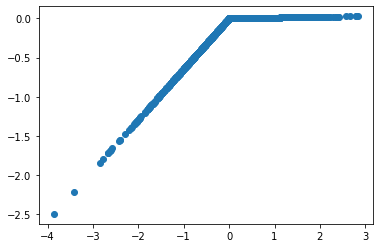

In [501]:
plt.scatter(data_surrogate.isel(feature=feature_index), output.isel(feature=feature_index))
plt.plot(breaking_points.x.isel(feature=feature_index), breaking_points.y.isel(feature=feature_index))

In [485]:
result = xr.concat(arr, dim="feature").assign_coords({"feature":data_surrogate.coords["feature"]})

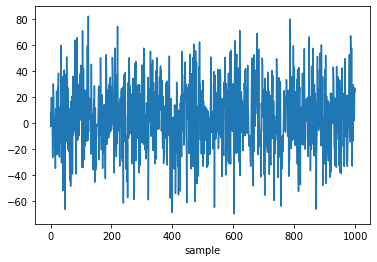

In [488]:
result.sum(dim="feature").plot()

In [459]:
breaking_points.isel(feature= feature_index)and


<xarray.Dataset>
Dimensions:         (breaking_point: 3)
Coordinates:
  * breaking_point  (breaking_point) int64 -1 0 1
    feature         object (-170, -70)
Data variables:
    x               (breaking_point) float64 nan 0.0 nan
    y               (breaking_point) float64 nan 0.0 nan
    slopes          (breaking_point) float64 0.004773 1.801 -0.2717

In [448]:
n_feature = breaking_point.sizes["feature"]
for feature in range(n_feature):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-448-b31a2e6e4015>, line 3)

In [398]:
x = np.arange(-2,2,0.01)
feature_index=99

In [437]:
y = piecewise_combined(data_surrogate.isel(feature=feature_index).values, breaking_points_merged.x.isel(feature=feature_index).values, breaking_points_merged.y.isel(feature=feature_index).values, slopes.isel(feature=feature_index).values)

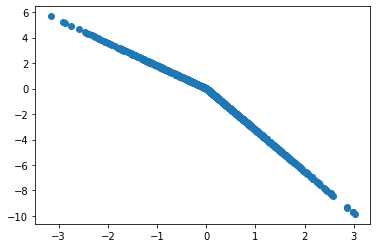

In [438]:
plt.scatter(data_surrogate.isel(feature=feature_index).values,y)
plt.plot(breaking_points_merged.x.isel(feature=feature_index),breaking_points_merged.y.isel(feature=feature_index))

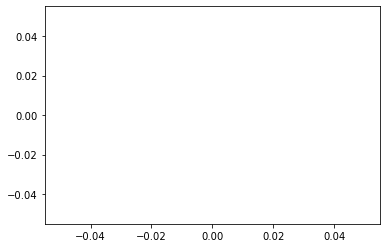

In [439]:
plt.plot(breaking_points_merged.x.isel(feature=feature_index),breaking_points_merged.y.isel(feature=feature_index))

In [ ]:
def piecewise_combined(x, y_s, x_s, slope):
    value = np.nan

    condlist = []
    funclist = []
        
    condlist.append(x < x_s[0])
    func = lambda k: y_s[0] + slope[0]*(k-x_s[0])
    funclist.append(func )
    print(x_s[0], y_s[0])
    print("inner loop")
    
    for i in range(0,len(x_s)-1):
        print(x_s[i])
        print(x_s[i+1])
        print(y_s[i])
        print("slope", slope[i+1])
        condlist.append( (  (x >= x_s[i]) * (x < x_s[i+1])))  
        del func
        func =  lambda k: y_s[i] + slope[i+1]*(k-x_s[i])
        funclist.append( func)

    
    
    condlist.append(x >= x_s[-1])
    print(x_s[-1])
    funclist.append( lambda k: y_s[-1] + slope[-1]*(k -x_s[-1]))


    #return condlist, funclist
    return np.piecewise(x , condlist, funclist), condlist, funclist

ValueError: x and y must be the same size

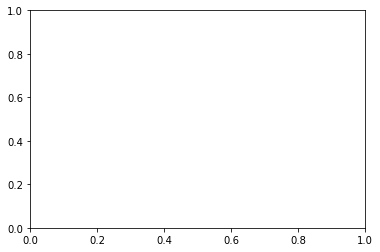

In [94]:
plt.scatter(data_surrogate.isel(feature=feature_index).values,y, s = 1)

#plt.plot(breaking_points_merged.x.isel(feature=feature_index), breaking_points_merged.y.isel(feature=feature_index))

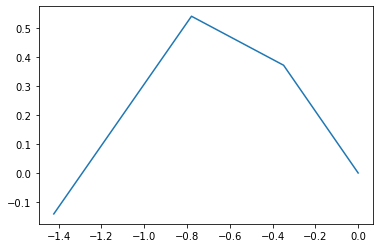

In [288]:
plt.plot(breaking_points_merged.x.isel(feature=feature_index), breaking_points_merged.y.isel(feature=feature_index))

In [55]:
def piecewise_combined(x, y_s, x_s, slope):
    value = np.nan

    condlist = []
    funclist = []
        
    print(x, y_s, x_s, slope)
    funclist.append(lambda x: y_s[0] + slope[0]*(x-x_s[0]) )
    condlist.append(x < x_s[0])

    for i in range(0,len(x_s)-1):
        condlist.append((x >= x_s[i]) * (x <= x_s[i+1]))    
        funclist.append(lambda x : linear(x , x_s[i], y_s[i], slope[i+1]))
    
    condlist.append(x > x_s[-1])
    funclist.append( lambda x : y_s[-1] + slope[-1]*(x -x_s[-1]))

    #print(x,condlist,funclist)
    return np.piecewise(x , condlist, funclist)

In [238]:
def piecewise_combined(x, breaking_points, slopes, breaking_dim):
    value = np.nan

    condlist = []
    funclist = []

    n_breaking_points = breaking_points.sizes[breaking_dim]
    
    func = lambda x: breaking_points.y.sel({breaking_dim:0}) + slopes.sel({breaking_dim:-1})*(x-breaking_points.x.sel({breaking_dim:0}))
    condlist.append(x < breaking_points.x.sel({breaking_dim:0}))
    funclist.append(func)

    for i in range(0, n_breaking_points - 1):
        condlist.append( (x >= breaking_points.x.sel({breaking_dim:i})) * (x <=breaking_points.x.sel({breaking_dim:i+1})))    
        
        funclist.append(lambda x :  breaking_points.y.sel({breaking_dim:i }) + slopes.sel({breaking_dim: i})*(x-breaking_points.x.sel({breaking_dim:i})))
    
    func = lambda x: breaking_points.y.sel({breaking_dim:n_breaking_points}) + slopes.sel({breaking_dim:n_breaking_points+1})*(x-breaking_points.x.sel({breaking_dim:n_breaking_points}))
    condlist.append(x < breaking_points.x.sel({breaking_dim:n_breaking_points-1}))
    funclist.append(func)
    return np.piecewise(x , condlist, funclist)

In [ ]:
piecewise_combined

In [239]:
x,funclist, condlist = piecewise_combined(data_surrogate.isel(feature=0), breaking_points.isel(feature=0), slopes.isel(feature=0), breaking_dim="breaking_point")

AttributeError: 'DataArray' object has no attribute 'x'

In [854]:
np.piecewise(x, condlist, funclist)

ValueError: with 1 condition(s), either 1 or 2 functions are expected

In [848]:
funclist

[<function __main__.piecewise_combined.<locals>.<lambda>(x)>,
 <function __main__.piecewise_combined.<locals>.<lambda>(x)>,
 <function __main__.piecewise_combined.<locals>.<lambda>(x)>,
 <function __main__.piecewise_combined.<locals>.<lambda>(x)>,
 <function __main__.piecewise_combined.<locals>.<lambda>(x)>]

In [850]:
x

<xarray.DataArray (sample: 1000)>
array([ 1.79161476e+00,  1.07096974e+00,  1.69892785e-01,  1.28981155e+00,
       -3.97415426e-01,  1.39364492e+00,  8.14050897e-01, -1.45379910e+00,
       -1.00147101e-01,  7.85602960e-01,  6.30932292e-01, -1.29544724e-01,
       -9.23759851e-01, -1.04113496e+00,  7.93523665e-01,  6.35585179e-01,
        2.13909315e-01, -2.56039098e-01,  7.44505451e-01, -2.17211339e-01,
       -5.23026579e-01,  6.04564902e-01, -2.53328670e-01, -1.00410300e+00,
        1.17834025e-01,  4.03597508e-01, -9.08992526e-01, -6.34491264e-01,
        2.22280093e-01,  2.32615699e-01,  4.45198131e-02,  1.46640316e+00,
       -1.92809305e+00, -8.80237952e-01,  1.15474812e+00,  7.98044471e-01,
        1.25831635e+00, -8.85496660e-01,  9.90595300e-01, -6.57339689e-01,
        4.40132253e-01,  3.42081112e-01, -1.88771142e+00, -2.78314594e-01,
       -1.54641099e+00,  2.78064722e+00, -4.58857867e-01,  1.33751654e-02,
       -2.71294808e+00,  6.62477522e-01, -2.26767683e-01, -6.43996666e-01,
       -1.51201120e+00, -6.24298329e-01,  4.36743199e-01, -4.11849038e-01,
        8.87238448e-01, -1.50512072e+00,  3.70789846e-02,  1.49211201e+00,
        1.95206096e-01, -2.96088140e-01,  7.75513775e-01, -1.08451514e+00,
        1.12200692e-01, -1.06049192e+00, -3.27996685e-01, -3.44366207e-01,
       -1.73557657e+00,  2.25856724e+00, -5.80349083e-01, -7.69121777e-01,
        2.02904535e+00, -6.59090761e-01, -8.08414840e-01, -1.66229270e+00,
       -3.44687166e-01,  1.47300025e+00, -1.48873585e+00,  1.39931190e+00,
...
        4.85247499e-01,  1.00812413e+00,  3.06814017e-01, -1.99275489e+00,
        8.85313862e-01, -1.37733502e+00,  1.53668176e+00, -7.08614883e-01,
       -7.57558252e-01,  7.10773202e-01, -8.22190828e-01, -5.16388847e-01,
       -2.08093490e+00, -8.03181570e-01,  8.85598877e-02,  1.06937392e+00,
       -1.76786091e+00, -1.23125640e-01, -1.48487516e+00, -3.19757271e-01,
       -2.05387178e-01,  1.00400067e+00, -7.33812062e-02, -3.48065844e-01,
        9.85032306e-01,  6.20280532e-01,  8.44833343e-01,  7.25686201e-01,
        2.57832016e+00,  5.32206056e-01,  4.85336149e-01, -1.00277702e+00,
        1.96850846e-01, -5.14864520e-01,  1.72717924e+00,  3.41730482e-01,
       -1.64124045e+00,  1.03207592e+00,  1.70462376e+00,  7.24692931e-01,
        9.12823837e-01,  4.64019795e-02, -3.67711889e-02,  7.64101260e-02,
        7.97644245e-01,  3.46140418e-01, -1.08862961e-02,  1.50472560e+00,
        7.01776642e-01, -2.49405319e-01, -6.56168078e-01, -4.23173765e-01,
        3.51849203e-01,  1.36101393e-01,  1.64556392e+00, -3.83800956e-01,
        6.32335633e-01,  1.72110669e+00,  1.21582866e-01, -8.99213900e-01,
       -4.66492454e-01,  3.09160897e-01,  7.66035162e-01,  2.76515590e-01,
       -3.16856367e-01, -1.16093923e+00,  6.93163674e-01, -9.16773168e-01,
        1.12386758e+00, -1.37185329e+00, -4.61201911e-02,  9.34592944e-01,
       -6.19665579e-01,  2.07417376e-01,  1.55217706e+00,  9.88735059e-01,
       -2.52404616e-01,  7.31792253e-01,  1.10499682e+00,  3.09979459e-01])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
    feature  object (-180, -90)

In [859]:
condlist[4]

<xarray.DataArray (sample: 1000)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
...
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])
Coordinates:
  * sample          (sample) int64 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
    feature         object (-180, -90)
    breaking_point  int64 3

In [810]:
breaking_points.x.isel(feature=0)

4

In [806]:
func = [lambda x: breaking_points.y.sel(breaking_point=0) + slopes.sel(breaking_point=0)*(x-breaking_points.x.sel(breaking_point=0))]
cond = [data_surrogate.isel(sample=0) < breaking_points.x.sel(breaking_point=0)]

In [818]:
breaking_points.x.isel(feature=0)

<xarray.DataArray 'x' (breaking_point: 4)>
array([-1.08380582, -0.29714303,  0.        ,  2.13845395])
Coordinates:
    feature         object (-180, -90)
  * breaking_point  (breaking_point) int64 0 1 2 3

In [816]:
data_surrogate.isel(feature=0)

<xarray.DataArray (sample: 1000)>
array([ 1.79161476e+00,  1.07096974e+00,  1.69892785e-01,  1.28981155e+00,
       -3.97415426e-01,  1.39364492e+00,  8.14050897e-01, -1.45379910e+00,
       -1.00147101e-01,  7.85602960e-01,  6.30932292e-01, -1.29544724e-01,
       -9.23759851e-01, -1.04113496e+00,  7.93523665e-01,  6.35585179e-01,
        2.13909315e-01, -2.56039098e-01,  7.44505451e-01, -2.17211339e-01,
       -5.23026579e-01,  6.04564902e-01, -2.53328670e-01, -1.00410300e+00,
        1.17834025e-01,  4.03597508e-01, -9.08992526e-01, -6.34491264e-01,
        2.22280093e-01,  2.32615699e-01,  4.45198131e-02,  1.46640316e+00,
       -1.92809305e+00, -8.80237952e-01,  1.15474812e+00,  7.98044471e-01,
        1.25831635e+00, -8.85496660e-01,  9.90595300e-01, -6.57339689e-01,
        4.40132253e-01,  3.42081112e-01, -1.88771142e+00, -2.78314594e-01,
       -1.54641099e+00,  2.78064722e+00, -4.58857867e-01,  1.33751654e-02,
       -2.71294808e+00,  6.62477522e-01, -2.26767683e-01, -6.43996666e-01,
       -1.51201120e+00, -6.24298329e-01,  4.36743199e-01, -4.11849038e-01,
        8.87238448e-01, -1.50512072e+00,  3.70789846e-02,  1.49211201e+00,
        1.95206096e-01, -2.96088140e-01,  7.75513775e-01, -1.08451514e+00,
        1.12200692e-01, -1.06049192e+00, -3.27996685e-01, -3.44366207e-01,
       -1.73557657e+00,  2.25856724e+00, -5.80349083e-01, -7.69121777e-01,
        2.02904535e+00, -6.59090761e-01, -8.08414840e-01, -1.66229270e+00,
       -3.44687166e-01,  1.47300025e+00, -1.48873585e+00,  1.39931190e+00,
...
        4.85247499e-01,  1.00812413e+00,  3.06814017e-01, -1.99275489e+00,
        8.85313862e-01, -1.37733502e+00,  1.53668176e+00, -7.08614883e-01,
       -7.57558252e-01,  7.10773202e-01, -8.22190828e-01, -5.16388847e-01,
       -2.08093490e+00, -8.03181570e-01,  8.85598877e-02,  1.06937392e+00,
       -1.76786091e+00, -1.23125640e-01, -1.48487516e+00, -3.19757271e-01,
       -2.05387178e-01,  1.00400067e+00, -7.33812062e-02, -3.48065844e-01,
        9.85032306e-01,  6.20280532e-01,  8.44833343e-01,  7.25686201e-01,
        2.57832016e+00,  5.32206056e-01,  4.85336149e-01, -1.00277702e+00,
        1.96850846e-01, -5.14864520e-01,  1.72717924e+00,  3.41730482e-01,
       -1.64124045e+00,  1.03207592e+00,  1.70462376e+00,  7.24692931e-01,
        9.12823837e-01,  4.64019795e-02, -3.67711889e-02,  7.64101260e-02,
        7.97644245e-01,  3.46140418e-01, -1.08862961e-02,  1.50472560e+00,
        7.01776642e-01, -2.49405319e-01, -6.56168078e-01, -4.23173765e-01,
        3.51849203e-01,  1.36101393e-01,  1.64556392e+00, -3.83800956e-01,
        6.32335633e-01,  1.72110669e+00,  1.21582866e-01, -8.99213900e-01,
       -4.66492454e-01,  3.09160897e-01,  7.66035162e-01,  2.76515590e-01,
       -3.16856367e-01, -1.16093923e+00,  6.93163674e-01, -9.16773168e-01,
        1.12386758e+00, -1.37185329e+00, -4.61201911e-02,  9.34592944e-01,
       -6.19665579e-01,  2.07417376e-01,  1.55217706e+00,  9.88735059e-01,
       -2.52404616e-01,  7.31792253e-01,  1.10499682e+00,  3.09979459e-01])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
    feature  object (-180, -90)

In [ ]:
piecewise_combined(a)

In [807]:
np.piecewise(data_surrogate.isel(sample=0), func, cond)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 648 but corresponding boolean dimension is 1

In [783]:
func(5)

TypeError: 'list' object is not callable

In [767]:
breaking_dim="breaking_point"

In [769]:
breaking_points = xr.merge([breaking_points_zero_sorted.rename("x"), breaking_points_y.rename("y")])

In [770]:
breaking_points

<xarray.Dataset>
Dimensions:         (breaking_point: 4, feature: 648)
Coordinates:
  * feature         (feature) MultiIndex
  - lon             (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170
  - lat             (feature) int64 -90 -80 -70 -60 -50 -40 ... 40 50 60 70 80
  * breaking_point  (breaking_point) int64 0 1 2 3
Data variables:
    x               (breaking_point, feature) float64 -1.084 -1.563 ... 1.595
    y               (breaking_point, feature) float64 -0.01206 ... -0.5647

In [ ]:
def cal_breaking_points_xy(data, n_breaking_points):
    quantiles = gen_random_quantiles(data = data, n_breaking_points = 3)

In [671]:
breaking_points

<xarray.Dataset>
Dimensions:         (breaking_point: 4, feature: 648)
Coordinates:
  * feature         (feature) MultiIndex
  - lon             (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170
  - lat             (feature) int64 -90 -80 -70 -60 -50 -40 ... 40 50 60 70 80
  * breaking_point  (breaking_point) int64 0 1 2 3
Data variables:
    x               (breaking_point, feature) float64 -0.3214 -0.3592 ... 0.9982
    y               (breaking_point, feature) float64 0.0 0.0 ... -1.23 -1.726

In [376]:
def gen_breaking_points_x_from_quantiles_with_zero(data, quantiles, feature_dim = "feature", sample_dim="sample", quantile_dim ="quantile"):
    

    
    breaking_points = gen_breaking_points_from_quantiles(data=data, quantiles = quantiles)
    

    breaking_zero = xr.DataArray(np.zeros([1, n_feature]), dims = ["quantile_index", feature_dim],
     coords = {"quantile_index":[n_quantiles+1], "feature":data.coords[feature_dim]})

    breaking_points = xr.concat([breaking_zero, breaking_points], dim="quantile_index")

    breaking_points_sorted = np.sort(breaking_points.values, axis=0)
    breaking_points = xr.DataArray(breaking_points_sorted, dims = ["breaking_point", "feature"], coords = {"breaking_point":range(n_breaking_points),"feature":data.coords[feature_dim]})

    return breaking_points
    

In [582]:
def gen_xy_random_break_points(data, slopes, n_breaking_points, feature_dim = "feature", sample_dim ="sample"):


    quantiles = get_random_break_points(data, n_breaking_points-1, feature_dim = feature_dim, sample_dim=sample_dim)
    
    breaking_point_x = gen_breaking_x(data=data_surrogate, quantiles = quantiles, quantile_dim = "breaking_point")
    
    result = breaking_point_x
    return result



In [602]:
n_breaking_points = 3

In [604]:
breaking_point_x = gen_xy_random_break_points(data, slopes, n_breaking_points=3, feature_dim = "feature", sample_dim ="sample")

ValueError: conflicting sizes for dimension 'quantile': length 0 on <this-array> and length 2 on 'quantile'

In [383]:
breaking_point_x

<xarray.DataArray (breaking_point: 1, feature: 648)>
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
...
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])
Coordinates:
  * breaking_point  (breaking_point) int64 0
  * feature         (feature) MultiIndex
  - lon             (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170
  - lat             (feature) int64 -90 -80 -70 -60 -50 -40 ... 40 50 60 70 80

In [371]:
slopes

<xarray.DataArray (piece: 3, feature: 648)>
array([[-1.44913869, -1.27128159, -1.17572082, ..., -0.2090729 ,
        -1.10103446,  0.83477995],
       [ 1.1472952 , -0.56136909,  0.75634551, ...,  0.51291412,
         1.15574772,  0.28363384],
       [ 0.47526124, -0.75867968, -0.42553844, ..., -1.93608528,
         0.39870107, -0.87697985]])
Coordinates:
  * piece    (piece) int64 0 1 2
  * feature  (feature) MultiIndex
  - lon      (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170 170
  - lat      (feature) int64 -90 -80 -70 -60 -50 -40 -30 ... 30 40 50 60 70 80

In [369]:
breaking_point_x

<xarray.DataArray (quantile_index: 1, feature: 648)>
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
...
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])
Coordinates:
  * feature         (feature) MultiIndex
  - lon             (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170
  - lat             (feature) int64 -90 -80 -70 -60 -50 -40 ... 40 50 60 70 80
  * quantile_index  (quantile_index) int64 1

In [226]:
def get_random_break_points(data, n_breaking_points, feature_dim = "feature", sample_dim= "sample"):
    
    n_feature = data.sizes[feature_dim]
    
    quantiles = np.random.uniform(0,1, size = [n_breaking_points, n_feature])

    quantiles = xr.DataArray(quantiles, dims = ["breaking_point", feature_dim], coords = {"breaking_point": range(n_breaking_points), feature_dim:data.coords[feature_dim]})
    return quantiles

In [227]:
n_breaking_points = 1

In [228]:
quantiles = get_random_break_points(data_surrogate, n_breaking_points = n_breaking_points)

In [229]:
sample_dim = "sample"
feature_dim = "feature"

n_feature = data_surrogate.sizes[feature_dim]

In [ ]:
def gen_x_coordinates():
    arr = []
    for feature_index in range(n_feature):
        quantiles_xr = data_surrogate.isel(feature=[feature_index]).quantile(quantiles[:,feature_index], dim=sample_dim)
        quantiles_xr = quantiles_xr.assign_coords(quantile = range(n_breaking_points))
        quantiles_xr = quantiles_xr.rename({"quantile":"quantile_index"})
        arr.append(quantiles_xr)
    breaking_points = xr.concat(arr, dim="feature")

    return breaking_points
    

In [230]:
arr = []
for feature_index in range(n_feature):
    quantiles_xr = data_surrogate.isel(feature=[feature_index]).quantile(quantiles[:,feature_index], dim=sample_dim)
    quantiles_xr = quantiles_xr.assign_coords(quantile = range(n_breaking_points))
    quantiles_xr = quantiles_xr.rename({"quantile":"quantile_index"})
    arr.append(quantiles_xr)

In [231]:
breaking_points = xr.concat(arr, dim="feature")

In [232]:
zeroes_xr = xr.DataArray(np.zeros([1, n_feature]), dims = ["quantile_index", "feature"], coords = {"quantile_index":[n_breaking_points], "feature":data_surrogate.coords[feature_dim]})

In [233]:
breaking_points = xr.concat([zeroes_xr, breaking_points], dim="quantile_index")

In [234]:
slopes = xarray_multivariate_normal_zeromean(covariance = cov_stack, n_sample = n_breaking_points +2, feature_dim="feature", sample_dim ="piece")

In [321]:
breaking_points = xr.DataArray(breaking_points_sorted, dims = ["breaking_point", "feature"], coords = {"breaking_point":range(n_breaking_points+1),"feature":data_surrogate.coords[feature_dim]})

In [324]:
breaking_points[:,7]

<xarray.DataArray (breaking_point: 2)>
array([-2.10852924,  0.        ])
Coordinates:
  * breaking_point  (breaking_point) int64 0 1
    feature         object (-180, -20)

In [325]:
y = [xr.zeros_like(breaking_points).isel(breaking_point = 0)]

for sta_index in range(n_breaking_points):
    print(sta_index)
    print(end_index)
    end_index = sta_index+1
    x_end = breaking_points.isel(breaking_point=end_index)
    x_sta = breaking_points.isel(breaking_point=sta_index)
    
    slope = slopes.isel(piece = end_index)
    linear = ((x_end-x_sta)*slope + y[sta_index]).assign_coords({"breaking_point":end_index})

    y.append( linear )

0
1


In [326]:
y = xr.concat(y, dim="breaking_point")

In [272]:
(x_end-x_sta)*slope

<xarray.DataArray (feature: 648)>
array([ 2.11603760e+00, -6.93501875e-03,  9.18484802e-02,  5.21856697e-01,
        5.92025619e-01,  2.44116457e-02,  1.05672810e-01,  1.66950067e+00,
       -1.26135588e-01, -9.39948490e-01, -4.58450917e-01,  1.63390190e+00,
        1.41624558e+00, -6.74931707e-01,  1.52308981e-01, -4.82110165e-01,
        4.94433044e-01, -7.10138983e-01, -1.65580180e-01,  1.96431959e-02,
       -7.13974425e-01, -3.27646713e-01,  4.67776730e-01, -5.37828489e-02,
       -2.18064053e-02, -1.03041948e+00, -1.90176371e-02,  3.37347469e-01,
       -4.30039343e-01, -4.36556053e-02, -1.80480475e+00,  2.42465580e-01,
       -8.52687362e-01, -9.78040383e-02, -5.32446124e-02,  5.04714842e-01,
        5.53108353e-01,  5.79950504e-01, -9.08307272e-02,  5.87611692e-02,
       -2.27197688e-01, -1.34260093e+00,  9.22219067e-02, -1.32078947e+00,
       -1.83484056e-01,  1.84659585e+00, -9.30308150e-02,  9.78295176e-02,
        6.64352502e-01,  2.04760161e-01,  5.62155553e-01,  1.08919796e+00,
       -1.97505919e+00,  9.53434539e-01,  1.13050595e-01,  2.02041080e+00,
       -4.91853838e-01, -4.46588615e-01, -1.07693456e+00, -3.44840569e-01,
       -2.61062646e-01,  7.89022770e-01, -4.12465859e-01, -1.26991145e-01,
       -2.45207684e+00, -2.07356847e+00,  9.01536775e-02, -3.05616269e-01,
        4.78349462e-02,  4.07165260e-01, -2.52483434e-01,  8.23537729e-01,
       -6.07565008e-01,  8.74149721e-01,  5.47442529e-02,  1.03998478e+00,
        3.95976190e-01, -1.25258310e+00,  8.65912122e-01,  2.27469320e-01,
...
       -1.00798232e-02, -1.12705175e+00,  9.80730526e-01,  9.83216624e-02,
        1.70441164e-01, -5.15949345e-01, -8.90268798e-01, -2.07400484e-01,
        5.96628203e-01, -1.07640474e+00, -2.38382100e+00, -3.10445486e-01,
       -4.57788345e+00,  3.48491764e+00,  9.40642944e-01,  1.31418078e-01,
       -1.15682620e+00, -3.30202752e+00, -5.57791225e-02, -2.17148929e-02,
       -1.04836403e-01,  6.70170205e-01,  3.75143955e-01, -9.76968722e-02,
       -6.80226920e-01, -1.48123141e-01, -6.91144239e-01,  2.08473025e+00,
        1.52681616e+00,  5.00757201e-02, -8.76433193e-02,  1.39549681e-01,
       -9.39877199e-01,  2.65551722e-01,  2.16709781e+00,  1.43469284e+00,
        3.63555105e-01,  3.93508282e-01,  1.96750887e+00, -1.45604362e+00,
       -1.88521426e-01,  1.19093949e+00,  1.06069931e+00, -5.87941592e-01,
        1.76394960e-01,  1.30428730e-01,  1.75385324e-01,  4.63822952e-01,
       -2.19203187e-01,  2.78239475e-01,  2.88874335e-01, -1.15810804e+00,
       -1.73459536e-01, -2.70048408e-01, -1.07831192e+00, -1.74584863e-01,
        3.60111871e-01,  4.68057930e-01,  8.75494868e-02, -5.06833195e-01,
        9.31772935e-01, -6.94320913e-02,  6.03098421e-01,  4.33593436e-01,
       -5.34489469e-01,  1.92020045e+00,  6.64772384e-02,  1.72272060e-01,
       -3.18771804e-02,  8.87166634e-01, -1.93694383e+00, -2.26294540e-02,
        8.62989864e-01, -1.97084185e-02,  1.17828801e-01,  2.24297105e-02,
        2.89871494e-03,  2.67747302e-01, -2.95203055e-02, -5.92404859e-01])
Coordinates:
  * feature  (feature) MultiIndex
  - lon      (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170 170
  - lat      (feature) int64 -90 -80 -70 -60 -50 -40 -30 ... 30 40 50 60 70 80
    piece    int64 1

In [279]:
data = (x_end-x_sta)*slope + y.isel(breaking_point = sta_index)

In [280]:
data

<xarray.DataArray (feature: 648)>
array([ 2.11603760e+00, -6.93501875e-03,  9.18484802e-02,  5.21856697e-01,
        5.92025619e-01,  2.44116457e-02,  1.05672810e-01,  1.66950067e+00,
       -1.26135588e-01, -9.39948490e-01, -4.58450917e-01,  1.63390190e+00,
        1.41624558e+00, -6.74931707e-01,  1.52308981e-01, -4.82110165e-01,
        4.94433044e-01, -7.10138983e-01, -1.65580180e-01,  1.96431959e-02,
       -7.13974425e-01, -3.27646713e-01,  4.67776730e-01, -5.37828489e-02,
       -2.18064053e-02, -1.03041948e+00, -1.90176371e-02,  3.37347469e-01,
       -4.30039343e-01, -4.36556053e-02, -1.80480475e+00,  2.42465580e-01,
       -8.52687362e-01, -9.78040383e-02, -5.32446124e-02,  5.04714842e-01,
        5.53108353e-01,  5.79950504e-01, -9.08307272e-02,  5.87611692e-02,
       -2.27197688e-01, -1.34260093e+00,  9.22219067e-02, -1.32078947e+00,
       -1.83484056e-01,  1.84659585e+00, -9.30308150e-02,  9.78295176e-02,
        6.64352502e-01,  2.04760161e-01,  5.62155553e-01,  1.08919796e+00,
       -1.97505919e+00,  9.53434539e-01,  1.13050595e-01,  2.02041080e+00,
       -4.91853838e-01, -4.46588615e-01, -1.07693456e+00, -3.44840569e-01,
       -2.61062646e-01,  7.89022770e-01, -4.12465859e-01, -1.26991145e-01,
       -2.45207684e+00, -2.07356847e+00,  9.01536775e-02, -3.05616269e-01,
        4.78349462e-02,  4.07165260e-01, -2.52483434e-01,  8.23537729e-01,
       -6.07565008e-01,  8.74149721e-01,  5.47442529e-02,  1.03998478e+00,
        3.95976190e-01, -1.25258310e+00,  8.65912122e-01,  2.27469320e-01,
...
       -1.00798232e-02, -1.12705175e+00,  9.80730526e-01,  9.83216624e-02,
        1.70441164e-01, -5.15949345e-01, -8.90268798e-01, -2.07400484e-01,
        5.96628203e-01, -1.07640474e+00, -2.38382100e+00, -3.10445486e-01,
       -4.57788345e+00,  3.48491764e+00,  9.40642944e-01,  1.31418078e-01,
       -1.15682620e+00, -3.30202752e+00, -5.57791225e-02, -2.17148929e-02,
       -1.04836403e-01,  6.70170205e-01,  3.75143955e-01, -9.76968722e-02,
       -6.80226920e-01, -1.48123141e-01, -6.91144239e-01,  2.08473025e+00,
        1.52681616e+00,  5.00757201e-02, -8.76433193e-02,  1.39549681e-01,
       -9.39877199e-01,  2.65551722e-01,  2.16709781e+00,  1.43469284e+00,
        3.63555105e-01,  3.93508282e-01,  1.96750887e+00, -1.45604362e+00,
       -1.88521426e-01,  1.19093949e+00,  1.06069931e+00, -5.87941592e-01,
        1.76394960e-01,  1.30428730e-01,  1.75385324e-01,  4.63822952e-01,
       -2.19203187e-01,  2.78239475e-01,  2.88874335e-01, -1.15810804e+00,
       -1.73459536e-01, -2.70048408e-01, -1.07831192e+00, -1.74584863e-01,
        3.60111871e-01,  4.68057930e-01,  8.75494868e-02, -5.06833195e-01,
        9.31772935e-01, -6.94320913e-02,  6.03098421e-01,  4.33593436e-01,
       -5.34489469e-01,  1.92020045e+00,  6.64772384e-02,  1.72272060e-01,
       -3.18771804e-02,  8.87166634e-01, -1.93694383e+00, -2.26294540e-02,
        8.62989864e-01, -1.97084185e-02,  1.17828801e-01,  2.24297105e-02,
        2.89871494e-03,  2.67747302e-01, -2.95203055e-02, -5.92404859e-01])
Coordinates:
  * feature         (feature) MultiIndex
  - lon             (feature) int64 -180 -180 -180 -180 -180 ... 170 170 170 170
  - lat             (feature) int64 -90 -80 -70 -60 -50 -40 ... 40 50 60 70 80
    piece           int64 1
    breaking_point  int64 0

In [323]:
for start_index, x_start in enumerate(break_points[0:-1]):
    end_index = start_index+1
    x_end = break_points[end_index]
    y[end_index] = (x_end-x_start)*slope[end_index]+y[start_index]

In [356]:
x=np.linspace(-3,3,100)

In [357]:
x_s = break_points
y_s = y_shift

In [358]:
condlist = []
funclist = []

funclist.append(lambda x: y_s[0] + slope[0]*(x-x_s[0]) )
condlist.append(x < x_s[0])

for i in range(0,len(x_s)-1):
    condlist.append((x >= x_s[i]) * (x <= x_s[i+1]))    
    funclist.append(lambda x : linear(x , x_s[i], y_s[i], slope[i+1]))

condlist.append(x > x_s[-1])
funclist.append( lambda x : y_s[-1] + slope[-1]*(x -x_s[-1]))


In [365]:
len(condlist)

6

In [371]:
list(x)

[-3.0,
 -2.9393939393939394,
 -2.878787878787879,
 -2.8181818181818183,
 -2.757575757575758,
 -2.696969696969697,
 -2.6363636363636362,
 -2.5757575757575757,
 -2.515151515151515,
 -2.4545454545454546,
 -2.393939393939394,
 -2.333333333333333,
 -2.2727272727272725,
 -2.212121212121212,
 -2.1515151515151514,
 -2.090909090909091,
 -2.0303030303030303,
 -1.9696969696969697,
 -1.9090909090909092,
 -1.8484848484848484,
 -1.7878787878787878,
 -1.7272727272727273,
 -1.6666666666666665,
 -1.606060606060606,
 -1.5454545454545454,
 -1.4848484848484849,
 -1.4242424242424243,
 -1.3636363636363635,
 -1.303030303030303,
 -1.2424242424242424,
 -1.1818181818181817,
 -1.121212121212121,
 -1.0606060606060606,
 -1.0,
 -0.9393939393939394,
 -0.8787878787878789,
 -0.8181818181818183,
 -0.7575757575757573,
 -0.6969696969696968,
 -0.6363636363636362,
 -0.5757575757575757,
 -0.5151515151515151,
 -0.4545454545454546,
 -0.39393939393939403,
 -0.33333333333333304,
 -0.2727272727272725,
 -0.21212121212121193,
 -0.

In [373]:
funclist[0](20)

<xarray.DataArray ()>
array(6.8207115)
Coordinates:
    piece     int64 0
    location  object (-180, -90)

In [360]:
funclist

[<function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>,
 <function __main__.<lambda>(x)>]

In [361]:
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [367]:
x.shape

(100,)

In [362]:
np.piecewise(x , condlist, funclist)

ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1

In [326]:
break_points

array([-2.11332167, -0.24475831,  0.        ,  1.11329007,  1.23892189])

In [324]:
y

array([0.        , 0.92535704, 1.56079839, 3.12225686, 3.28689983])

In [330]:
y_shift

array([-1.56079839, -0.63544134,  0.        ,  1.56145848,  1.72610145])

In [350]:
piecewise_combined(data.isel(lat=0,lon=0).values, y_s=y_shift, x_s=break_points, slope=slope)

[-1.34273814e+00  9.06941407e-01  1.04737649e+00 -4.32037177e-02
 -6.02733860e-01  7.48294131e-01  2.52593305e-01 -1.11409304e+00
 -1.55555202e+00  3.82642604e-01 -8.56996415e-01 -7.63801430e-01
  3.15342942e-02 -1.44215919e+00 -7.94874464e-01  1.07640417e+00
 -1.48042614e+00 -5.42684362e-01 -1.57200141e-01 -9.14784581e-02
 -1.89772529e+00  6.73781433e-01  6.03194662e-02 -2.85763664e-01
  1.88544980e+00 -1.91889303e-01  6.08140610e-01  3.33119344e-01
 -1.95569664e+00 -1.40446916e+00 -1.64560539e-01  5.43304989e-01
  1.14909902e+00 -9.24691925e-01 -2.24079194e-01  1.58119570e+00
  9.17258888e-02  7.95692980e-01  6.74454341e-01 -5.79179977e-01
  1.14386080e+00 -1.99319488e+00  6.46097962e-01 -2.09168522e-01
 -2.50530928e-01  2.09972496e-01  1.46099986e+00 -1.29315652e+00
  1.29698910e-01  8.01382116e-01  4.84728174e-01 -6.80605457e-01
  5.78473626e-01  1.02777784e+00 -3.09724153e-01  2.58994369e-01
 -6.48695655e-01  5.57201858e-01 -1.25476089e-01  2.32091575e-01
  3.06257899e-01  1.57392

ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1

In [349]:
def (x, y_s, x_s, slope):
    value = np.nan

    condlist = []
    funclist = []
    print(x)
    print(y_s)
    print(x_s)
    print(slope)

    funclist.append(lambda x: y_s[0] + slope[0]*(x-x_s[0]) )
    condlist.append(x < x_s[0])

    for i in range(0,len(x_s)-1):
        condlist.append((x >= x_s[i]) * (x <= x_s[i+1]))    
        funclist.append(lambda x : linear(x , x_s[i], y_s[i], slope[i+1]))
    
    condlist.append(x > x_s[-1])
    funclist.append( lambda x : y_s[-1] + slope[-1]*(x -x_s[-1]))

    return np.piecewise(x , condlist, funclist)

In [327]:
shift = y[break_points==0]

In [328]:
y_shift = y-shift

In [329]:
y_shift

array([-1.56079839, -0.63544134,  0.        ,  1.56145848,  1.72610145])

In [155]:
def get_startvalues_piecewise_linear_function(timeseries, k, slope):
    

    quantile_values = get_random_quantiles(timeseries, k )

    # Add Zero as a specific quantile with value -1 
    quantile_extended = xr.concat([quantile_values, xr.DataArray([0],dims = ["quantile"], coords ={"quantile":[-1]})], dim="quantile")

    # Extract and sort boundaries
    x = quantile_extended.sortby(quantile_extended)

    # Get the index of the y = 0 value
    x_index_0 = int(x["quantile"].argmin())

    # Initialise Dictionary to save the start values for each segment
    y_s = {}

    # Set the y value to zero
    y_s[float(x.isel(quantile = x_index_0))] = 0

    # forward loop starting from zero index
    for x_s_index in range(x_index_0, x.sizes["quantile"]-1):
        x_s = float(x.isel(quantile = x_s_index))
        x_e = float(x.isel(quantile = x_s_index+1))


        y = linear(x_e, x_s, y_s[x_s], slope[x_s_index+1])
   
        y_s[x_e]=y
  

    # backward loop starting from zero index

    for x_s_index in np.arange(x_index_0,0,-1):

        x_s = float(x.isel(quantile = x_s_index-1))
        x_e = float(x.isel(quantile = x_s_index))
        
        y = y_s[x_e] - (x_e-x_s)*slope[x_s_index]
        
        y_s[x_s]=y


    y_s = xr.DataArray(list(y_s.values()), dims =["x"], coords = {"x": list(y_s.keys())})
    y_s_sorted = y_s.sortby(y_s)

    return x, y_s_sorted, quantile_values
        

In [130]:
def generate_piecewise_values(mean, covariance, k, feature_dim="feature"):

    slopes = np.random.multivariate_normal(mean_stack, covariance_stack, size=k+1)
    slopes = xr.DataArray(slopes, dims = ["piece",feature_dim], coords ={"piece":np.arange(k+1), "location":mean.coords[feature_dim]}).unstack()

    return slopes    



In [150]:
slopes = generate_piecewise_values(mean_stack, covariance_stack, k = 5)

In [156]:
x, y, quantiles = get_startvalues_piecewise_linear_function(data_surrogate.isel(feature=0), k=5, slope=slopes.isel(feature=0))

In [158]:
x

<xarray.DataArray (quantile: 5)>
array([-1.41672626, -0.72260345, -0.52150443,  0.        ,  0.68473639])
Coordinates:
  * quantile  (quantile) float64 0.06987 0.219 0.286 -1.0 0.7522

In [145]:
x = x.rename("x")

In [146]:
y = y.rename("y")

In [148]:
x

<xarray.DataArray 'x' (quantile: 5)>
array([-1.36365919e+00, -6.43932914e-01,  0.00000000e+00,  2.91129472e-04,
        1.11053020e+00])
Coordinates:
  * quantile  (quantile) float64 0.07731 0.2388 -1.0 0.499 0.8594

In [149]:
y

<xarray.DataArray 'y' (quantile: 5)>
array([0.00000000e+00, 2.70723140e-04, 3.56164225e-02, 1.15655856e-01,
       5.54219201e-01])
Coordinates:
  * quantile  (quantile) float64 0.0 0.0002911 -1.364 -0.6439 1.111

In [147]:
xr.merge([x,y])

<xarray.Dataset>
Dimensions:   (quantile: 10)
Coordinates:
  * quantile  (quantile) float64 -1.364 -1.0 -0.6439 0.0 ... 0.499 0.8594 1.111
Data variables:
    x         (quantile) float64 nan 0.0 nan nan ... -0.6439 0.0002911 1.111 nan
    y         (quantile) float64 0.03562 nan 0.1157 0.0 ... nan nan nan 0.5542

In [125]:
slopes.isel(feature=0)

<xarray.DataArray (piece: 6)>
array([ 1.17509479,  1.58601636, -0.60746668, -2.3522382 ,  0.555939  ,
        1.09413006])
Coordinates:
  * piece     (piece) int64 0 1 2 3 4 5
    location  object (-180, -90)

In [351]:
def linear(x, x_s, y_s, slope):
    return y_s + (x-x_s)*slope 

In [353]:
def get_startvalues_piecewise_linear_function(timeseries, k, slope):
    

    quantile_values = get_random_quantiles(timeseries, k )

    
    # Add Zero as a specific quantile with value -1 
    quantile_extended = xr.concat([quantile_values, xr.DataArray([0],dims = ["quantile"], coords ={"quantile":[-1]})], dim="quantile")

    # Extract and sort boundaries
    x = quantile_extended.sortby(quantile_extended)

    # Get the index of the y = 0 value
    x_index_0 = int(x["quantile"].argmin())

    # Initialise Dictionary to save the start values for each segment
    y_s = {}

    # Set the y value to zero
    y_s[float(x.isel(quantile = x_index_0))] = 0

    # forward loop starting from zero index
    for x_s_index in range(x_index_0, x.sizes["quantile"]-1):
        x_s = float(x.isel(quantile = x_s_index))
        x_e = float(x.isel(quantile = x_s_index+1))


        y = linear(x_e, x_s, y_s[x_s], slope[x_s_index+1])
   
        y_s[x_e]=y
  

    # backward loop starting from zero index

    for x_s_index in np.arange(x_index_0,0,-1):

        x_s = float(x.isel(quantile = x_s_index-1))
        x_e = float(x.isel(quantile = x_s_index))
        
        y = y_s[x_e] - (x_e-x_s)*slope[x_s_index]
        
        y_s[x_s]=y


    y_s = xr.DataArray(list(y_s.values()), dims =["quantile"], coords = {"quantile": list(y_s.keys())})
    y_s_sorted = y_s.sortby(y_s)

    return x, y_s_sorted
        

In [ ]:
def piecewise_combined(x, y_s, x_s, slope):

    np.piecewise(x, [x < x_s[0], ((x >= 0) & (x < 10)), x > x_s[-1]], [0, 1, 10])

In [354]:
def piecewise_combined(x, y_s, x_s, slope):
    value = np.nan


    
    if x < x_s[0]:
        value =  y_s.sel(quantile = float(x_s[0])) + slope[0]*(x-x_s[0]) 

    if x > x_s[-1]:
        value = y_s.sel(quantile = float(x_s[-1])) + slope[-1]*(x -x_s[-1])

    for i in range(0, len(x_s)-1):
        if ((x >= x_s[i]) and (x <= x_s[i+1])):
            value = linear(x , x_s[i], y_s.sel(quantile = float(x_s[i])), slope[i+1])
            #print(x,i,float(value))

    return float(value)

In [427]:
def piecewise_combined(x, y_s, x_s, slope):
    value = np.nan

    condlist = []
    funclist = []

    funclist.append(lambda x: y_s[0] + slope[0]*(x-x_s[0]) )
    condlist.append(x < x_s[0])

    for i in range(0,len(x_s)-1):
        condlist.append((x >= x_s[i]) * (x <= x_s[i+1]))    
        funclist.append(lambda x : linear(x , x_s[i], y_s[i], slope[i+1]))
    
    condlist.append(x > x_s[-1])
    funclist.append( lambda x : y_s[-1] + slope[-1]*(x -x_s[-1]))
    
    return np.piecewise(x , condlist, funclist)

In [111]:
y_s = range(10)
x_s = range(10)
slope=range(12)

x= np.linspace(-10,10,1000)

# loop through all points

In [438]:
x_s.values

array([-1.28861086, -1.10171759,  0.        ,  0.19333376,  1.03383428])

In [439]:
y_s.values

array([-0.35989572,  0.        ,  0.30152529,  0.48751151,  0.55495456])

In [112]:
da_arr = []
for lat_index in range(N_lat):
    da_lon_arr = []
    for lon_index in range(N_lon):
        x_s, y_s = get_startvalues_piecewise_linear_function(data.isel(lat=lat_index,lon=lon_index), k=k, slope = slopes.isel(lat=lat_index,lon=lon_index))
        samples = piecewise_combined(data.isel(lat=lat_index, lon=lon_index).values, y_s.values, x_s.values, slopes.isel(lat=lat_index,lon=lon_index).values)
        
        da_lon_arr.append(xr.DataArray(samples, dims = ["sample"], coords = {"sample":range(N_sample)}).assign_coords({"lat":lat_index, "lon":lon_index}))
    da_arr.append(xr.concat(da_lon_arr, dim="lon"))

            

AttributeError: 'numpy.ndarray' object has no attribute 'isel'

In [357]:
function_output = xr.concat(da_arr, dim="lat")

In [358]:

data.to_netcdf("../data/data_input.nc")

In [359]:
function_output.to_netcdf("../data/data_output.nc")

In [374]:
lat_index=2
lon_indes=5

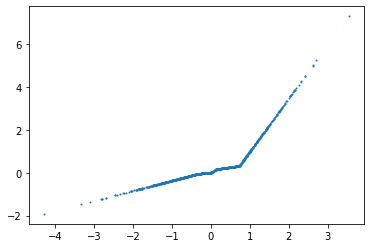

In [375]:
plt.scatter(data.isel(lat=lat_index,lon=lon_index), function_output.isel(lat=lat_index, lon=lon_index),s=1)